In [168]:
%pylab qt5
%matplotlib
import scipy.stats
import scipy.constants as const

Populating the interactive namespace from numpy and matplotlib
Using matplotlib backend: Qt5Agg


In [149]:
pylab.rcParams['figure.figsize'] = (10, 6)

In [150]:
import os

In [151]:
V = dict()
pab = dict()
pauf = dict()
csvs = [name for name in os.listdir() if name.endswith('grad.csv')]
for name in csvs:
    daten = loadtxt(name, delimiter=',', skiprows=1)
    print(name[:-8])
    T = float(name[:-8])
    V[T] = daten[:, 0]
    pab[T] = daten[:, 1]
    pauf[T] = daten[:, 2]

25
40
35
30
55
47.5
45
42.5
50


### Gruppe 2 (wir)

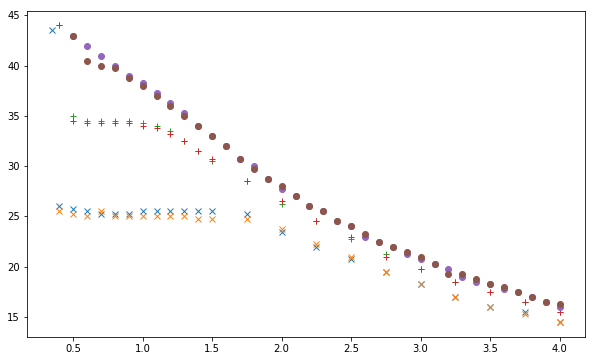

In [152]:
grp2 = {30:'x', 42.5:'+', 50:'o'}
args = []
for x in grp2:
    args.append(V[x])
    args.append(transpose([pab[x], pauf[x]]))
    args.append(grp2[x])
plt.plot(*args)

### Gruppe 1

In [153]:
# 25, 40, 47.5
# grad25 = loadtxt('./25grad.csv', delimiter=',', skiprows=1)
# V25, pab25, pauf25 = grad25[:, 0], grad25[:, 1], grad25[:, 2]
# grad425 = loadtxt('./42.5grad.csv', delimiter=',', skiprows=1)
# V425, pab425, pauf425 = grad425[:, 0], grad425[:, 1], grad425[:, 2]
# grad50 = loadtxt('./50grad.csv', delimiter=',', skiprows=1)
# V50, pab50, pauf50 = grad50[:, 0], grad50[:, 1], grad50[:, 2]

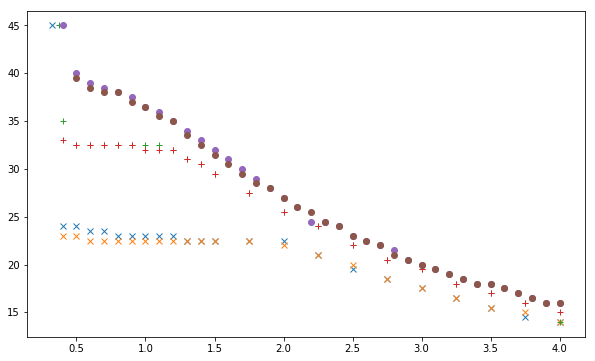

In [154]:
grp1 = {25:'x', 40:'+', 47.5:'o'}
args = []
for x in grp1:
    args.append(V[x])
    args.append(transpose([pab[x], pauf[x]]))
    args.append(grp1[x])
plt.plot(*args)

### Gruppe 3

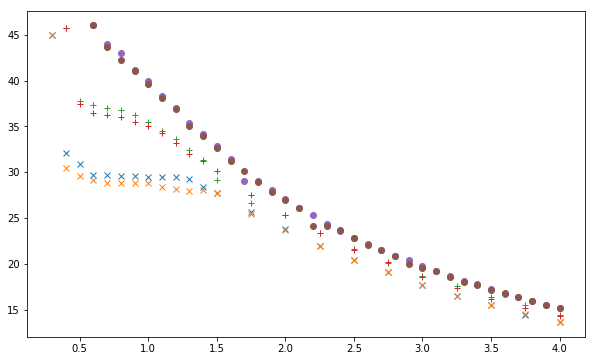

In [155]:
grp3 = {35:'x', 45:'+', 55:'o'}
args = []
for x in grp3:
    args.append(V[x])
    args.append(transpose([pab[x], pauf[x]]))
    args.append(grp3[x])
plt.plot(*args)

In [156]:
alle = dict(grp1); alle.update(grp2); alle.update(grp3)

In [157]:
# mitteln pab und pauf zu p
p = {}
for T in alle:
    p[T] = .5 * (pab[T] + pauf[T])
    p[T][where(isnan(p[T]))] = pab[T][where(isnan(p[T]))]

47.5 Grad: (Gruppe 1)
n R T = 7.5175839003391465 Joule
n1 = 0.0028197655586642252

50 Grad: (Gruppe 2)
n R T = 7.563094295876462 Joule
n2 = 0.002814889279564141

55 Grad: (Gruppe 3)
n R T = 6.854644628506384 Joule
n3 = 0.002512340490284236



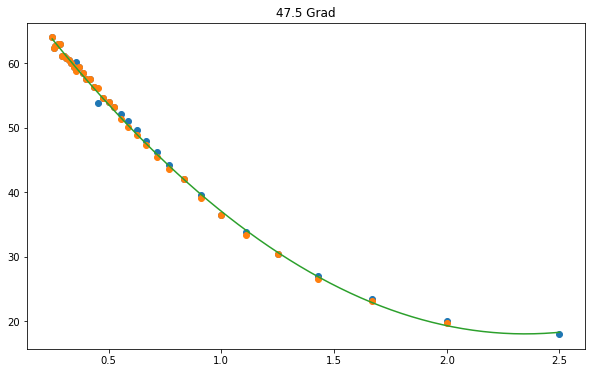

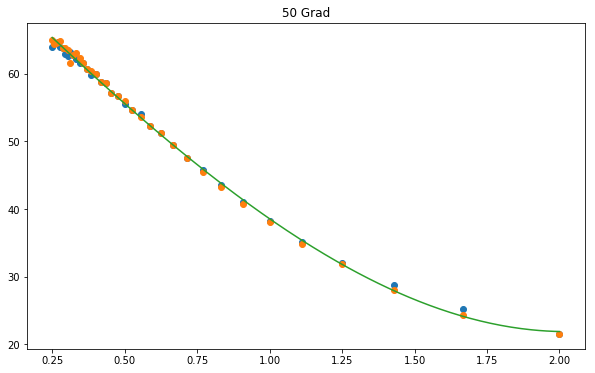

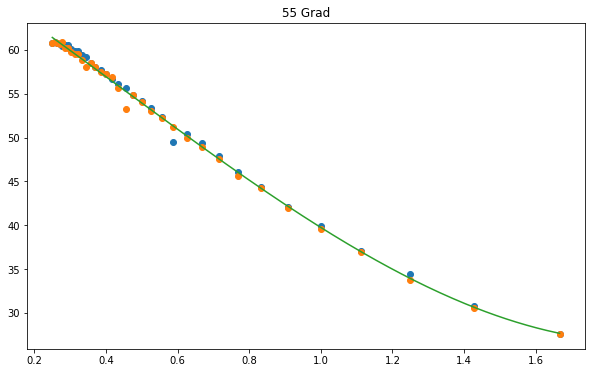

In [158]:
uberkrit = {47.5:1, 50:2, 55:3}
for T in uberkrit:
    _ = plt.figure()
    Vol = V[T]
    _ = plt.plot(1/Vol, transpose([pab[T]*Vol, pauf[T]*Vol]), 'o')
    a, b, c, d = scipy.polyfit(1/Vol, p[T]*V[T], deg=3)
    n = d * .1 / const.R / (T + const.zero_Celsius)
    print(f'{T} Grad: (Gruppe {uberkrit[T]})')
    print(f'n R T = {d * .1} Joule')
    print(f'n{uberkrit[T]} = {n}')
    print()
    exec(f'n{uberkrit[T]} = {n}')
    x = linspace(min(1/Vol), max(1/Vol), 200)
    _ = plt.plot(x, a*x**3 + b*x**2 + c*x + d)
    _ = plt.title(f'{T} Grad')

In [159]:
const.zero_Celsius

273.15

## Aufgabe 4

In [160]:
grp = {1:grp1, 2:grp2, 3:grp3}
n = {1:n1, 2:n2, 3:n3}
V_m = {}
for i in range(1, 3+1):
    for T in grp[i]:
        V_m[T] = V[T] / n[i]

In [333]:
args = []
leg = []
for T in sorted(alle.keys(), reverse=True):
    args.append(V_m[T] * 1e-3) # Liter / mol
    args.append(p[T])
    args.append('o-')
    leg.append(f'T = {T} °C')
ax = plt.plot(*args)
_ = plt.legend(ax, leg)
_ = plt.xlabel('V_m in L/mol')
_ = plt.ylabel('p in 100 kPa')

In [202]:
for T in alle:
    A = transpose([V_m[T] * 1e-3, p[T]])
    savetxt(f'molar{T}.csv', A, delimiter=',', header='V_m,p', comments='')

In [264]:
for n, x in enumerate(V_m[42.5] * 1e-3):
    print(f'{n: >2}: {x}')

 0: 1.4210150392200727
 1: 1.3322015992688183
 2: 1.2433881593175635
 3: 1.154574719366309
 4: 1.0657612794150546
 5: 0.9769478394637999
 6: 0.8881343995125455
 7: 0.7993209595612909
 8: 0.7105075196100363
 9: 0.6216940796587818
10: 0.5328806397075273
11: 0.49735526372702543
12: 0.46182988774652367
13: 0.4263045117660218
14: 0.39077913578552
15: 0.35525375980501817
16: 0.31972838382451635
17: 0.2842030078440146
18: 0.24867763186351272
19: 0.2131522558830109
20: 0.17762687990250908
21: 0.1421015039220073


In [338]:
plat = {}
plat[25] = array([
    V_m[25][-2],
    .5 * V_m[25][8] + .5 * V_m[25][9]
])
plat[30] = array([
    V_m[25][-2],
    .8 * V_m[25][9] + .2 * V_m[25][10]
])
plat[35] = array([
    .5*V_m[35][-2] + .5*V_m[35][-3],
    .5*V_m[35][12] + .5*V_m[35][13]
])
plat[40] = array([
    .5*V_m[40][-2] + .5*V_m[40][-3],
    .5 * V_m[40][13] + .5 * V_m[40][14]
])
plat[42.5] = array([
    V_m[42.5][-2],
    V_m[42.5][15]
])

In [344]:
for obj in lines:
    obj.remove()
    
lines = []
for T in sorted(plat):
    a, b = plat[T]
    xs = (a <= V_m[T]) & (V_m[T] <= b)
    y = mean(p[T][xs])
    lines.append( plt.plot(array([a, b]) * 1e-3, [y, y], '|k-')[0] )
    print(f'{T: >4} °C: {plat[T]*1e-3}  {y:f}')

  25 °C: [0.14185576 0.6649489 ]  22.826923
  30 °C: [0.14185576 0.602887  ]  25.281250
  35 °C: [0.17911585 0.49754403]  29.287500
  40 °C: [0.15958774 0.40783532]  32.428571
42.5 °C: [0.17762688 0.35525376]  34.395833


In [323]:
V_m_crit = .248*1e3
p_crit = 36.1

In [335]:
ll[0].remove()
ll = plt.plot([V_m_crit * 1e-3], [p_crit], 'r+', markersize=18)